In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_df = pd.read_csv("music_df.csv")

In [6]:
# Confirm df was properly loaded
music_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,minutes,time_signature,isLiked
0,0,0.428,0.754,5,-6.416,0,0.1790,0.30000,0.000000,0.136,0.394,125.948,5.262883,4,1
1,1,0.402,0.527,9,-6.737,0,0.0917,0.11300,0.000008,0.105,0.310,81.420,5.651117,4,1
2,2,0.621,0.695,4,-5.124,1,0.0911,0.00584,0.000000,0.086,0.298,173.966,2.273467,4,1
3,3,0.725,0.725,8,-6.067,0,0.1590,0.01190,0.000000,0.086,0.515,140.003,3.200450,4,1
4,4,0.516,0.708,9,-4.465,0,0.0253,0.04940,0.000005,0.243,0.330,89.938,4.817783,3,1


In [49]:
#Drop extra index column
music_df.drop('Unnamed: 0', axis=1, inplace=True)

# Confirm data types and non null values
music_df.info()
music_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1140 non-null   float64
 1   energy            1140 non-null   float64
 2   key               1140 non-null   int64  
 3   loudness          1140 non-null   float64
 4   mode              1140 non-null   int64  
 5   speechiness       1140 non-null   float64
 6   acousticness      1140 non-null   float64
 7   instrumentalness  1140 non-null   float64
 8   liveness          1140 non-null   float64
 9   valence           1140 non-null   float64
 10  tempo             1140 non-null   float64
 11  minutes           1140 non-null   float64
 12  time_signature    1140 non-null   int64  
 13  isLiked           1140 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 124.8 KB


danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
minutes             0
time_signature      0
isLiked             0
dtype: int64

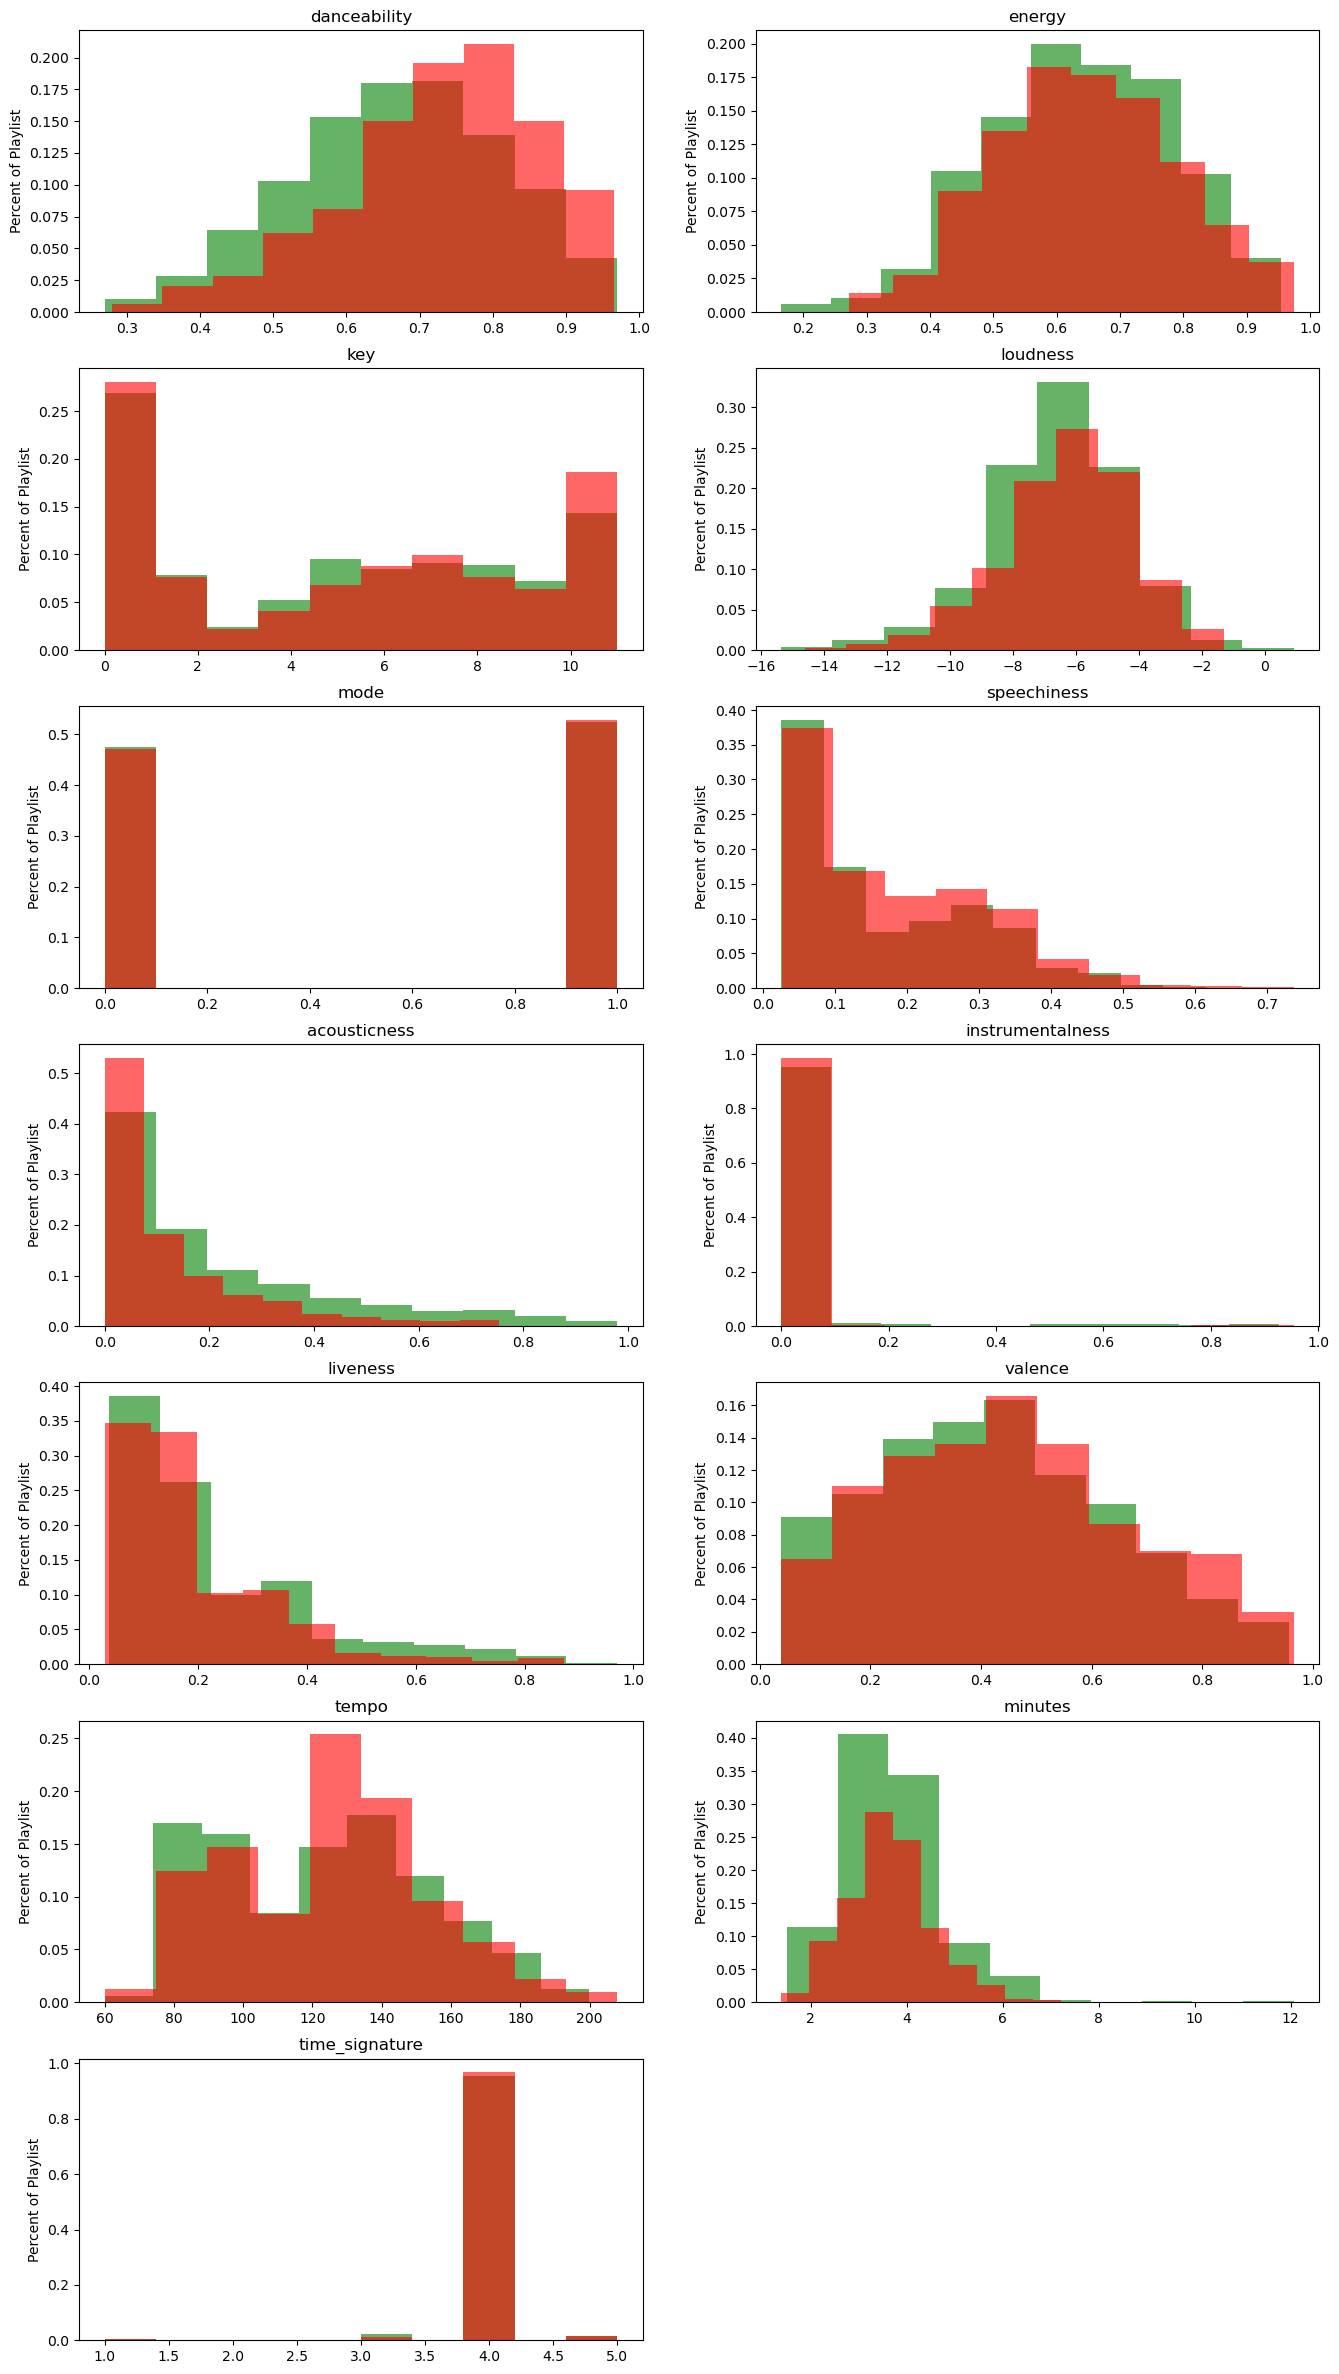

In [50]:
# View distributions
liked_df = music_df.loc[music_df['isLiked']==1].copy()
disliked_df = music_df.loc[music_df['isLiked']==0].copy()

# Remove isLiked from dfs
disliked_df.drop('isLiked', inplace=True, axis=1)
liked_df.drop('isLiked', axis=1, inplace=True)

# Iterate through features and graph distributions
features = liked_df.columns
plt.figure(figsize=(16, 30)) 
for index, feature in enumerate(features, 1):
    plt.subplot(7, 2, index)
    # Adjust to percentages to account for mismatch amounts
    plt.hist(liked_df[feature], weights=np.ones(len(liked_df)) / len(liked_df), color='green', alpha = .6)
    plt.hist(disliked_df[feature], weights=np.ones(len(disliked_df)) / len(disliked_df), color='red', alpha = .6)
    plt.ylabel("Percent of Playlist")
    plt.title(feature)
plt.show()